A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
# Data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Normalizing data

train_images, test_images = train_images / 255, test_images / 255

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Model
model1 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (28, 28, 1),
                  padding = "same"),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                50208     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 50,618
Trainable params: 50,618
Non-trainable params: 0
____________________________________________________

In [7]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Reshaping data to fit it into the model
train_images_2 = train_images.reshape(60000, 28, 28, 1)
test_images_2 = test_images.reshape(10000, 28, 28, 1)

In [10]:
history_model1 = model1.fit(train_images_2, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3496 - accuracy: 0.8957 - val_loss: 0.1473 - val_accuracy: 0.9592
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1760 - accuracy: 0.9469 - val_loss: 0.0989 - val_accuracy: 0.9715
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1309 - accuracy: 0.9603 - val_loss: 0.0856 - val_accuracy: 0.9748
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1048 - accuracy: 0.9676 - val_loss: 0.0735 - val_accuracy: 0.9787
Epoch 5/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0934 - accuracy: 0.9712 - val_loss: 0.0660 - val_accuracy: 0.9817


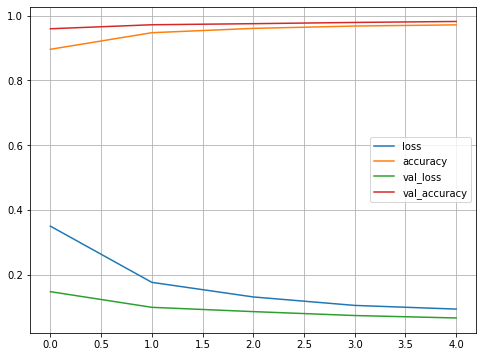

In [11]:
model_stats = pd.DataFrame(history_model1.history)

model_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

# Ejercicio 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [12]:
# Model
model2 = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (28, 28, 1),
                  padding = "same"),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(16, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                25104     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [14]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history_model2 = model2.fit(train_images_2, train_labels, epochs = 5, validation_split = .1)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3876 - accuracy: 0.8817 - val_loss: 0.1623 - val_accuracy: 0.9528
Epoch 2/5
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1953 - accuracy: 0.9405 - val_loss: 0.1191 - val_accuracy: 0.9660
Epoch 3/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1564 - accuracy: 0.9523 - val_loss: 0.0920 - val_accuracy: 0.9747
Epoch 4/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.0875 - val_accuracy: 0.9762
Epoch 5/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1197 - accuracy: 0.9621 - val_loss: 0.0809 - val_accuracy: 0.9758


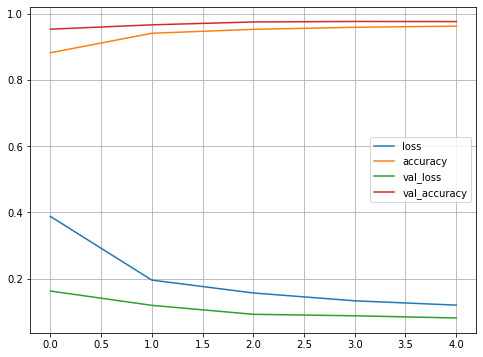

In [16]:
model_stats = pd.DataFrame(history_model2.history)

model_stats.plot(figsize = (8, 6))
plt.grid(True)
plt.show()

In [17]:
both_models_stats = pd.DataFrame(history_model1.history).join(pd.DataFrame(history_model2.history), how = "left", lsuffix = "_model1", rsuffix = "_model2")

both_models_stats

,loss_model1,accuracy_model1,val_loss_model1,val_accuracy_model1,loss_model2,accuracy_model2,val_loss_model2,val_accuracy_model2
0,0.349579,0.895704,0.147262,0.959167,0.387585,0.881722,0.162270,0.952833
1,0.176033,0.946944,0.098908,0.971500,0.195293,0.940537,0.119051,0.966000
2,0.130930,0.960315,0.085635,0.974833,0.156437,0.952333,0.092003,0.974667
3,0.104788,0.967556,0.073549,0.978667,0.132729,0.958611,0.087532,0.976167
4,0.093441,0.971167,0.066008,0.981667,0.119712,0.962056,0.080921,0.975833


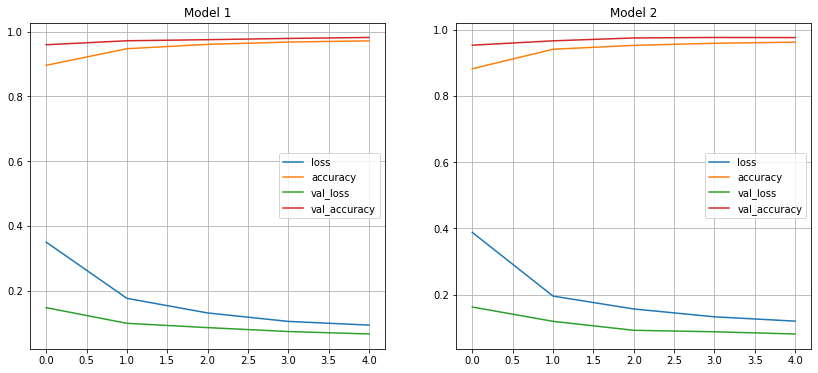

In [18]:
model1_stats = pd.DataFrame(history_model1.history)
model2_stats = pd.DataFrame(history_model2.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

model1_stats.plot(ax = ax1)
model2_stats.plot(ax = ax2)

ax1.grid(True)
ax2.grid(True)

ax1.set_title("Model 1")
ax2.set_title("Model 2")

plt.show()

Vemos que el modelo 1, con una capa menos, tiene un mejor rendimiento.